In [1]:
# 필요한 라이브러리 로딩
from selenium import webdriver as wb
# 웹 브라우저를 제어하기 위한 라이브러리
from selenium.webdriver.common.keys import Keys
# 웹에게 값을 '입력'받기 위한 라이브러리>> 컴퓨터용 키보드
from selenium.webdriver.common.by import By
# html 문서에서 태그와 선택자의 위치를 찾기 위한 라이브러리
from bs4 import BeautifulSoup as bs
# 컴퓨터가 이해하기 쉬운 객체로 변환해주는 라이브러리
import time   # 시간 관련 라이브러리
import pandas as pd  

In [2]:
driver = wb.Chrome()
driver.get('https://www.gmarket.co.kr/n/best')

In [3]:
# 클릭할 요소 가져오기!
img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
img

[<selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227b7b2ce6", element="f.C13081D4D750EB3949C1464078FA7392.d.E5C5E4F346A106368BAF06BCB9B1AD00.e.45")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227b7b2ce6", element="f.C13081D4D750EB3949C1464078FA7392.d.E5C5E4F346A106368BAF06BCB9B1AD00.e.39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227b7b2ce6", element="f.C13081D4D750EB3949C1464078FA7392.d.E5C5E4F346A106368BAF06BCB9B1AD00.e.46")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227b7b2ce6", element="f.C13081D4D750EB3949C1464078FA7392.d.E5C5E4F346A106368BAF06BCB9B1AD00.e.47")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227b7b2ce6", element="f.C13081D4D750EB3949C1464078FA7392.d.E5C5E4F346A106368BAF06BCB9B1AD00.e.48")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a334a8f999f20f046c34227

In [4]:
# 해당 요소 클릭!
img[0].click()

In [5]:
# 카테고리, 상품명, 가격 수집!
cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text

title = driver.find_element(By.CSS_SELECTOR, '#itemcase_basic > div.box__item-title > h1').text

price = driver.find_element(By.CSS_SELECTOR, '#itemcase_basic > div.box__item-title > div.price > span:nth-child(2) > strong').text

In [6]:
cate, title, price

('라운드넥티셔츠',
 '((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST',
 '9,900원')

In [7]:
# 뒤로 가기!
driver.back()

In [8]:
# img[1].click만 실행할 경우 error

# driver를 통해 웹브라우저에 명령을 내리기 위해서는, 현재 웹페이지 정보에서만 가능!
# 근데, 뒤로가기와 같은 페이지 새로고침이 일어날 경우, 
# 다시 웹페이지에 접근하여 요소에 접근해야함!
# -> 동적 크롤링

img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
img[1].click()

In [9]:
cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text

title = driver.find_element(By.CSS_SELECTOR, '#itemcase_basic > div.box__item-title > h1').text

price = driver.find_element(By.CSS_SELECTOR, '#itemcase_basic > div.box__item-title > div.price > span:nth-child(2) > strong').text

In [10]:
cate, title, price

('패밀리레스토랑', '(빕스) 15 000원 스프링 바우처 / 3월 19일부터 사용가능', '1,500원')

In [11]:
driver.quit()

### 실습! G마켓 Best 상품 Page에서 10ea의 상품 정보들을 스크래핑!
1. 크롬 브라우저 실행, url 요청(G마켓 Best 상품 Page)
2. 상품 클릭
3. 수집(상품명, 가격, 카테고리) 및 추출
4. 뒤로가기
5. 2~4 단계 반복
6. DataFrame화

In [ ]:
driver = wb.Chrome()
driver.get('https://www.gmarket.co.kr/n/best')

In [34]:
img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
img

[<selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77dbbe53158", element="f.642F2D13C2377CB489C9F52A303F3860.d.D8948F7018BD35FE4C7B92EEB3DF77A8.e.45")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77dbbe53158", element="f.642F2D13C2377CB489C9F52A303F3860.d.D8948F7018BD35FE4C7B92EEB3DF77A8.e.39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77dbbe53158", element="f.642F2D13C2377CB489C9F52A303F3860.d.D8948F7018BD35FE4C7B92EEB3DF77A8.e.46")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77dbbe53158", element="f.642F2D13C2377CB489C9F52A303F3860.d.D8948F7018BD35FE4C7B92EEB3DF77A8.e.47")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77dbbe53158", element="f.642F2D13C2377CB489C9F52A303F3860.d.D8948F7018BD35FE4C7B92EEB3DF77A8.e.48")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b63d7784f48affe6d9e7e77db

In [35]:
img[2].click()

In [44]:
cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text
cate

KeyboardInterrupt: 

In [25]:
title = driver.find_element(By.CLASS_NAME, 'itemtit').text
title

'((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST'

In [26]:
price = driver.find_element(By.CLASS_NAME, 'price_real').text
price

'9,900원'

In [45]:
driver = wb.Chrome()
driver.get('https://www.gmarket.co.kr/n/best')

cate_lst = []
title_lst = []
price_lst = []
for i in range(0,10) :
    img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
    img[i].click()
    cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text
    title = driver.find_element(By.CLASS_NAME, 'itemtit').text
    price = driver.find_element(By.CLASS_NAME, 'price_real').text
    cate_lst.append(cate)
    title_lst.append(title)
    price_lst.append(price)
    driver.back()
driver.quit()
print(cate_lst)
print(title_lst)
print(price_lst)

KeyboardInterrupt: 

In [42]:
dic = {'카테고리' : cate_lst, '상품명' : title_lst, '가격' : price_lst}

In [43]:
gmarket = pd.DataFrame(dic, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
gmarket

,카테고리,상품명,가격
1,라운드넥티셔츠,((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스...,"9,900원"
2,패밀리레스토랑,(빕스) 15 000원 스프링 바우처 / 3월 19일부터 사용가능,"1,500원"
3,바디케어,온더바디 발을씻자 코튼풋샴푸 자몽향 385ml 4개,"19,900원"
4,런닝세트,(무료반품/9950원/5매)트라이 스탠다드 베이직 남성 5번들 런닝 무료배송 (10...,"11,700원"
5,기타생활잡화,2개 헤드앤숄더 클리니컬 스트렝스 비듬방지 샴푸 3종 초록 보라 주황 400ml,"30,570원"
6,전복,더줌 전복 11-13미 1kg 쿠폰가 23700,"39,500원"
7,초등참고서,키즈 원리셈/ 원리셈 세트,"41,310원"
8,유아동티셔츠,10+5%쿠폰할인/24봄신상 신학기 한정수량 단독특가/가디건/상하복/원피스 외 1개...,"10,900원"
9,찌개/찜,G)사미헌 갈비탕5팩 (1팩1kg총 5kg),"56,550원"
10,기타수산가공식품,착한낙지 매콤~칼칼 착한낙지 135g x 6팩+비법소스 6팩,"23,920원"


In [46]:
# 기존에 했던 크롬 드라이버 설치 하는 방법
!pip install webdriver-manager

  Obtaining dependency information for webdriver-manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata


In [56]:
# 다른 PC(환경)에서도 코드를 실행할 수 있도록! (드라이버 설치 없이)
from selenium.webdriver.chrome.service import Service   # 경로 반환
from webdriver_manager.chrome import ChromeDriverManager # 크롬 드라이버 관리자

import pandas as pd

from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup as bs

import time

from tqdm import tqdm as tq # 반복문 시각화하는 도구

In [49]:
# 선생님풀이
# 1. 크롬 브라우저 실행, url 요청(G마켓 Best 상품 Page)
s = Service(ChromeDriverManager().install())
driver = wb.Chrome(service=s)
driver.get('https://www.gmarket.co.kr/n/best')

In [51]:
# 2. 상품 클릭
img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
img[0].click()

In [52]:
# 3. 수집(상품명, 가격, 카테고리) 및 추출
cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text
title = driver.find_element(By.CLASS_NAME, 'itemtit').text
price = driver.find_element(By.CLASS_NAME, 'price_real').text

cate, title, price

('라운드넥티셔츠',
 '((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST',
 '9,900원')

In [53]:
# 4. 뒤로가기
driver.back()

In [58]:
# 5. 2~4 단계 반복
driver = wb.Chrome(service=s)
driver.get('https://www.gmarket.co.kr/n/best')
cate_list = []
title_list = []
price_list = []

for i in tq(range(50)) : 
    img = driver.find_elements(By.CLASS_NAME, 'image__lazy.image__load')
    img[i].click()
    
    time.sleep(1)  # 요소가 load될 때까지 로직 멈추기!
    
    cate = driver.find_element(By.CSS_SELECTOR, 'div.location-navi > ul > li.on > a').text
    title = driver.find_element(By.CLASS_NAME, 'itemtit').text
    price = driver.find_element(By.CLASS_NAME, 'price_real').text
    # 추출 후 list에 하나씩 쌓기!
    cate_list.append(cate)
    title_list.append(title)
    price_list.append(price)
    driver.back()
    time.sleep(1)   # 요소가 load될 때까지 로직 멈추기!
    
# 자원 반납
driver.quit()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:23<00:00,  5.27s/it]


- 10번 반복문 실행하다가 50번으로 늘렸을 때 
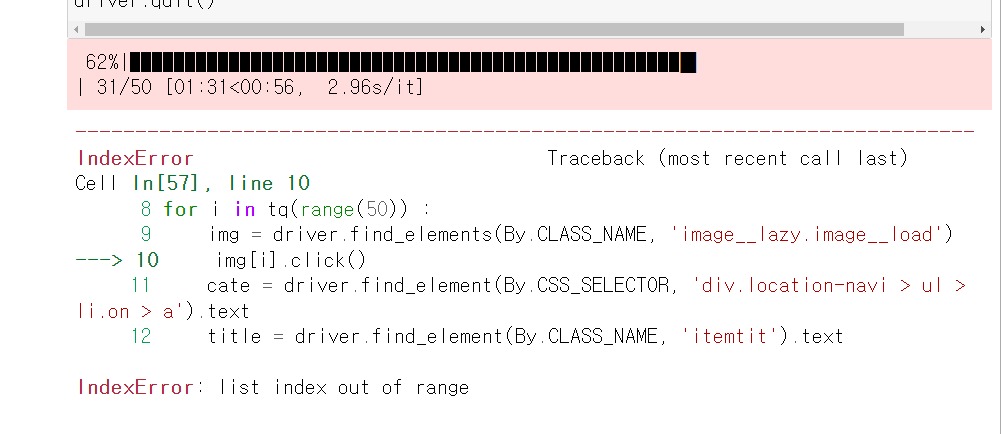
- 오류(날 수도 있음) => 페이지에서 아직 이미지 로딩 중인데 클릭하라고 하면 안됨

#### tqdm으로 반복문 시각화
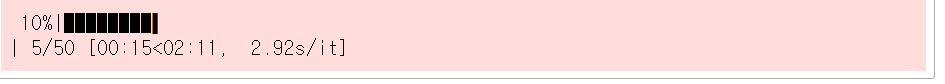
진행율(%) \n
반복된 개수/ 총 해야하는 개수 [소요시간<남은 시간, 개당 몇초 걸리는지]

In [60]:
# 6. DataFrame화
dic = {'카테고리' : cate_list, 
       '상품명' : title_list, 
       '가격' : price_list}
df = pd.DataFrame(dic)
df

,카테고리,상품명,가격
0,라운드넥티셔츠,((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스...,"9,900원"
1,바디케어,온더바디 발을씻자 코튼풋샴푸 자몽향 385ml 4개,"19,900원"
2,패밀리레스토랑,(빕스) 15 000원 스프링 바우처 / 3월 19일부터 사용가능,"1,500원"
3,런닝세트,(무료반품/9950원/5매)트라이 스탠다드 베이직 남성 5번들 런닝 무료배송 (10...,"11,700원"
4,초등참고서,키즈 원리셈/ 원리셈 세트,"41,310원"
5,전복,더줌 전복 11-13미 1kg 쿠폰가 23700,"39,500원"
6,유아동상하복세트,키즈꼬모x저스틴23 봄맞이 신상 등원룩/나들이룩 상하복세트 초특가전,"9,900원"
7,유아동티셔츠,10+5%쿠폰할인/24봄신상 신학기 한정수량 단독특가/가디건/상하복/원피스 외 1개...,"10,900원"
8,기타수산가공식품,착한낙지 매콤~칼칼 착한낙지 135g x 6팩+비법소스 6팩,"23,920원"
9,기타생활잡화,2개 헤드앤숄더 클리니컬 스트렝스 비듬방지 샴푸 3종 초록 보라 주황 400ml,"30,570원"


In [64]:
# csv 형식으로 저장!
# time.strftime('%Y%m%d_%H%M%S') : 현재 시점을 기준으로 연도, 월, 일, 시, 분, 초를 문자열로 반환!
df.to_csv(f'{time.strftime("%Y%m%d_%H%M%S")} G마켓 Bestsell Top 50.csv',
         encoding='utf-8')
# jupyter에서 확인하고 싶으면 인코딩을 utf-8 로 해야함!

In [63]:
time.strftime("%Y%m%d_%H%M%S")

'20240319_154621'